In [76]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
X_train = np.linspace(-1, 1, 20)

In [78]:
X_train

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [79]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [80]:
X_test = np.linspace(-1, 1, 20)

In [81]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

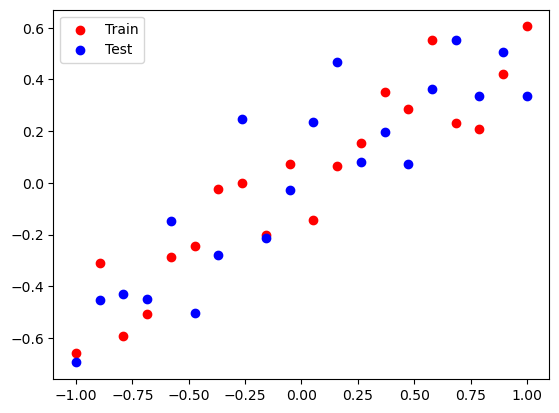

In [82]:
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="blue", label="Test")
plt.legend()
plt.show()

# Regression Model

In [84]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_1.compile(loss="mse", optimizer=adam, metrics=["accuracy"])
history = model_1.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test), verbose=False)

### Model Eavaluation

In [86]:
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print("Train: {}, Test: {}".format(train_mse, test_mse))

Train: 0.0, Test: 0.0


In [87]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 47ms/step


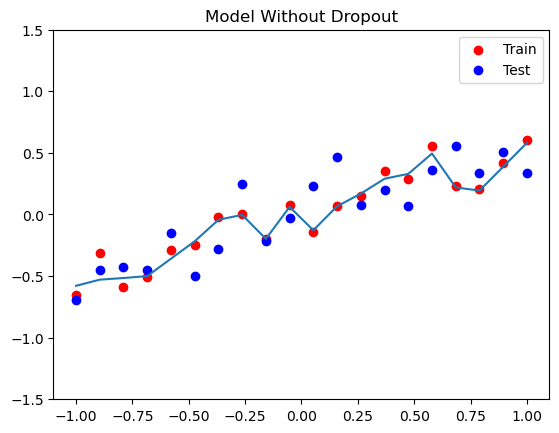

In [127]:
plt.figure()
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="blue", label="Test")
plt.plot(X_test, y_pred_1)
plt.legend()
plt.title("Model Without Dropout")
plt.ylim(-1.5, 1.5)
plt.show()

# Dropout Model ( P Value = 0.2)

In [90]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_2.compile(loss="mse", optimizer=adam, metrics=["accuracy"])
history = model_2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)


In [91]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print("Train: {}, Test: {}".format(train_mse, test_mse))

Train: 0.0, Test: 0.0


In [92]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 68ms/step


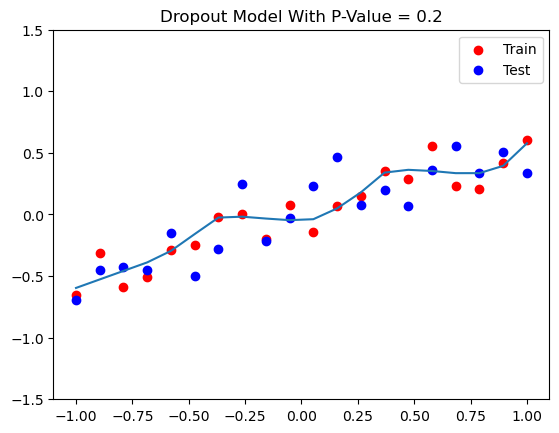

In [129]:
plt.figure()
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="blue", label="Test")
plt.plot(X_test, y_pred_2)
plt.legend()
plt.title("Dropout Model With P-Value = 0.2")
plt.ylim(-1.5, 1.5)
plt.show()

# Dropout Model (P Value = 0.5)

In [95]:
model_3 = Sequential()

model_3.add(Dense(128, input_dim=1, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)

model_3.compile(loss="mse", optimizer=adam, metrics=["accuracy"])
history = model_3.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=False)


In [96]:
_, train_mse = model_3.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_3.evaluate(X_test, y_test, verbose=0)
print("Train: {} Test: {}".format(train_mse, test_mse))

Train: 0.0 Test: 0.0


In [97]:
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 60ms/step


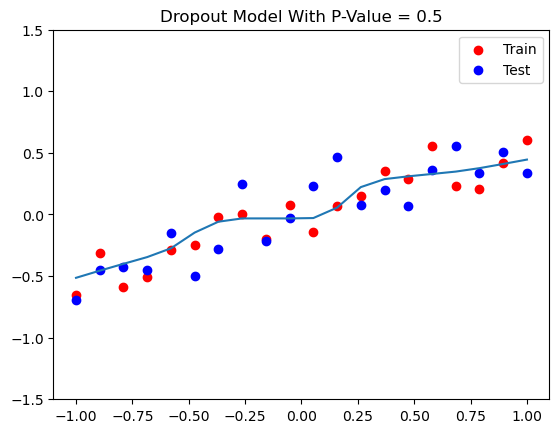

In [131]:
plt.figure()
plt.scatter(X_train, y_train, c="red", label="Train")
plt.scatter(X_test, y_test, c="blue", label="Test")
plt.plot(X_test, y_pred_3)
plt.legend()
plt.title("Dropout Model With P-Value = 0.5")
plt.ylim(-1.5, 1.5)
plt.show()